In [1]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [2]:
# Load the dataset
data = pd.read_csv('day.csv')

In [3]:
# Convert ordinal categorical variables to strings
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['weathersit'] = data['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_snow', 4: 'heavy_rain'})

In [4]:
# Drop unnecessary columns
data = data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Exploratory Data Analysis (EDA)

C:\Users\rizwan.shaik\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rizwan.shaik\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rizwan.shaik\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\r

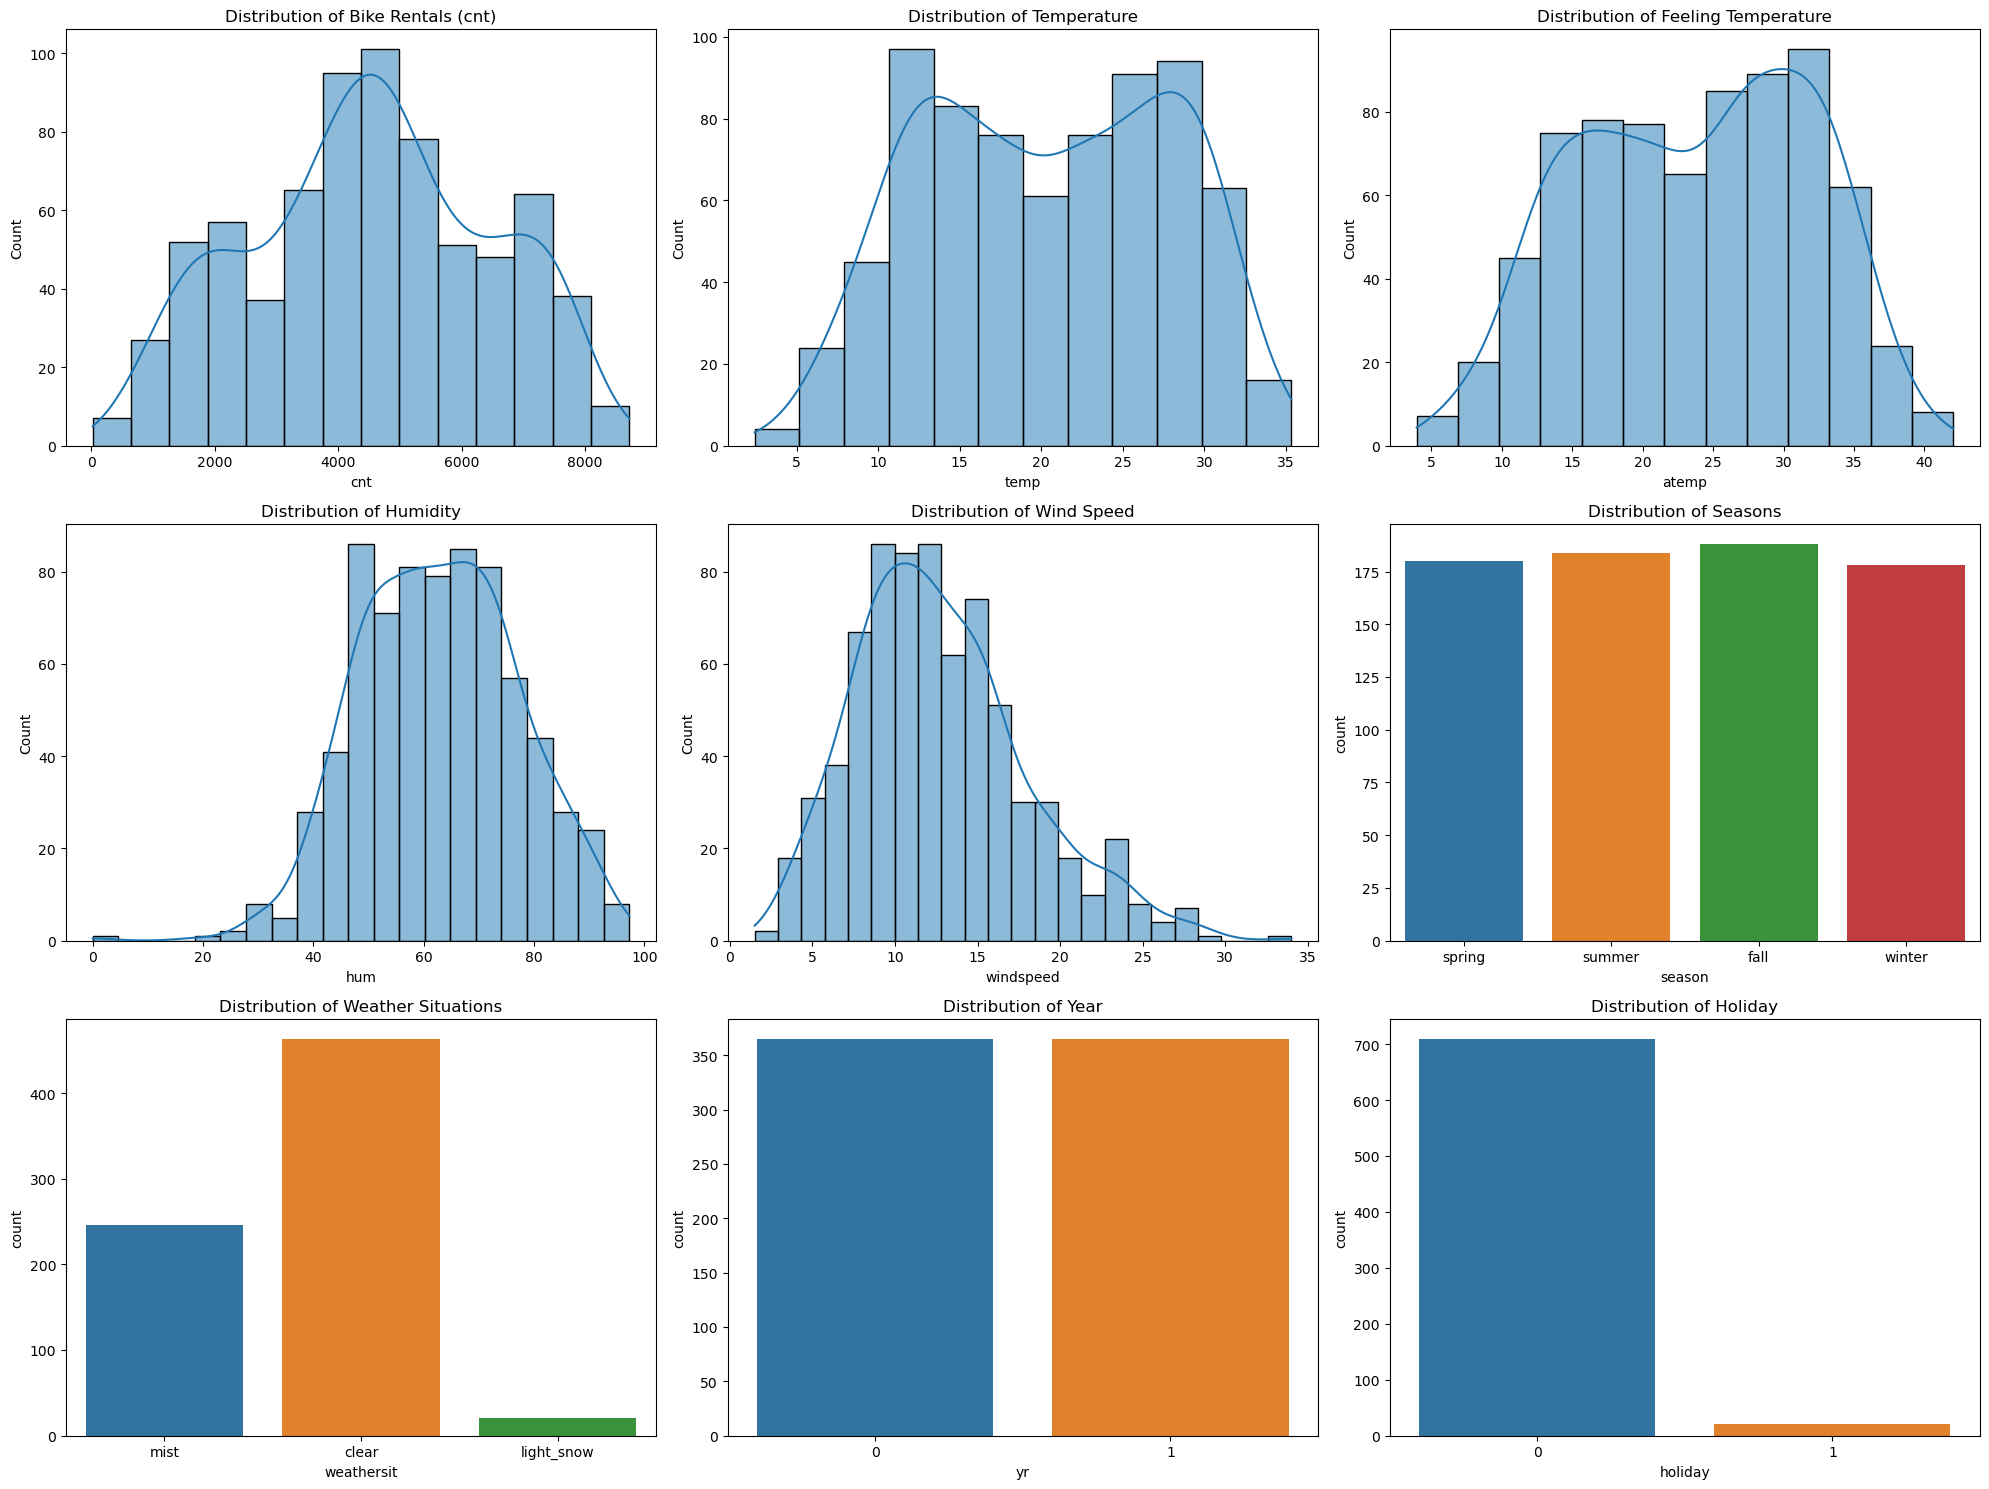

In [5]:
# Univariate Analysis
plt.figure(figsize=(20, 15))

plt.subplot(3, 3, 1)
sns.histplot(data['cnt'], kde=True)
plt.title('Distribution of Bike Rentals (cnt)')

plt.subplot(3, 3, 2)
sns.histplot(data['temp'], kde=True)
plt.title('Distribution of Temperature')

plt.subplot(3, 3, 3)
sns.histplot(data['atemp'], kde=True)
plt.title('Distribution of Feeling Temperature')

plt.subplot(3, 3, 4)
sns.histplot(data['hum'], kde=True)
plt.title('Distribution of Humidity')

plt.subplot(3, 3, 5)
sns.histplot(data['windspeed'], kde=True)
plt.title('Distribution of Wind Speed')

plt.subplot(3, 3, 6)
sns.countplot(data['season'])
plt.title('Distribution of Seasons')

plt.subplot(3, 3, 7)
sns.countplot(data['weathersit'])
plt.title('Distribution of Weather Situations')

plt.subplot(3, 3, 8)
sns.countplot(data['yr'])
plt.title('Distribution of Year')

plt.subplot(3, 3, 9)
sns.countplot(data['holiday'])
plt.title('Distribution of Holiday')

plt.tight_layout()
plt.show()

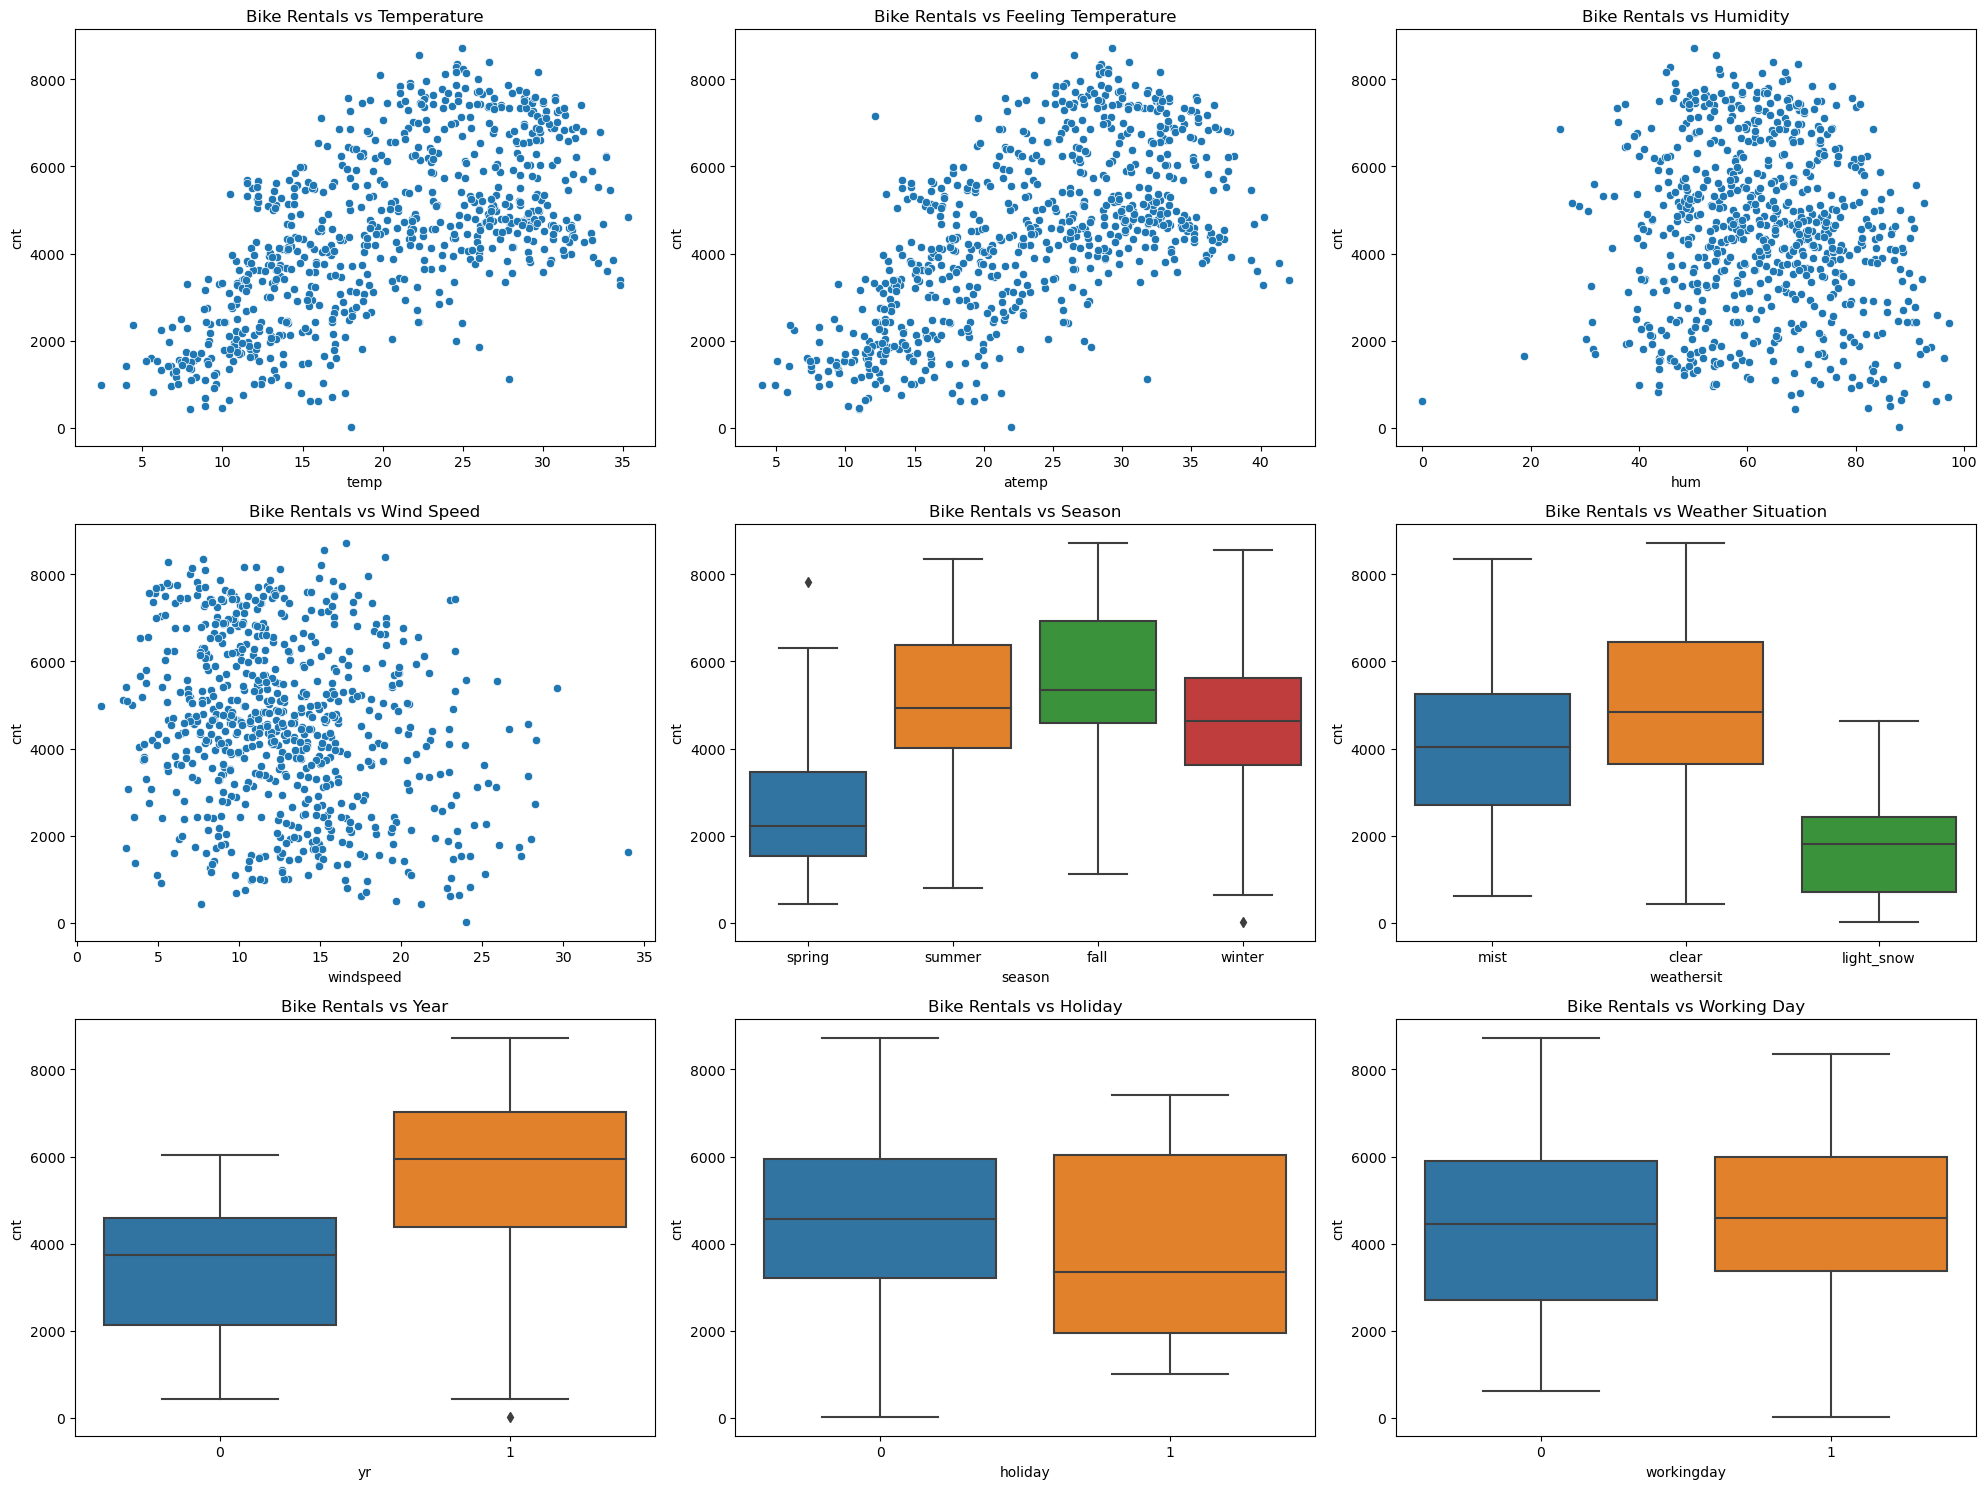

In [6]:
# Bivariate Analysis
plt.figure(figsize=(20, 15))

plt.subplot(3, 3, 1)
sns.scatterplot(x='temp', y='cnt', data=data)
plt.title('Bike Rentals vs Temperature')

plt.subplot(3, 3, 2)
sns.scatterplot(x='atemp', y='cnt', data=data)
plt.title('Bike Rentals vs Feeling Temperature')

plt.subplot(3, 3, 3)
sns.scatterplot(x='hum', y='cnt', data=data)
plt.title('Bike Rentals vs Humidity')

plt.subplot(3, 3, 4)
sns.scatterplot(x='windspeed', y='cnt', data=data)
plt.title('Bike Rentals vs Wind Speed')

plt.subplot(3, 3, 5)
sns.boxplot(x='season', y='cnt', data=data)
plt.title('Bike Rentals vs Season')

plt.subplot(3, 3, 6)
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.title('Bike Rentals vs Weather Situation')

plt.subplot(3, 3, 7)
sns.boxplot(x='yr', y='cnt', data=data)
plt.title('Bike Rentals vs Year')

plt.subplot(3, 3, 8)
sns.boxplot(x='holiday', y='cnt', data=data)
plt.title('Bike Rentals vs Holiday')

plt.subplot(3, 3, 9)
sns.boxplot(x='workingday', y='cnt', data=data)
plt.title('Bike Rentals vs Working Day')

plt.tight_layout()
plt.show()

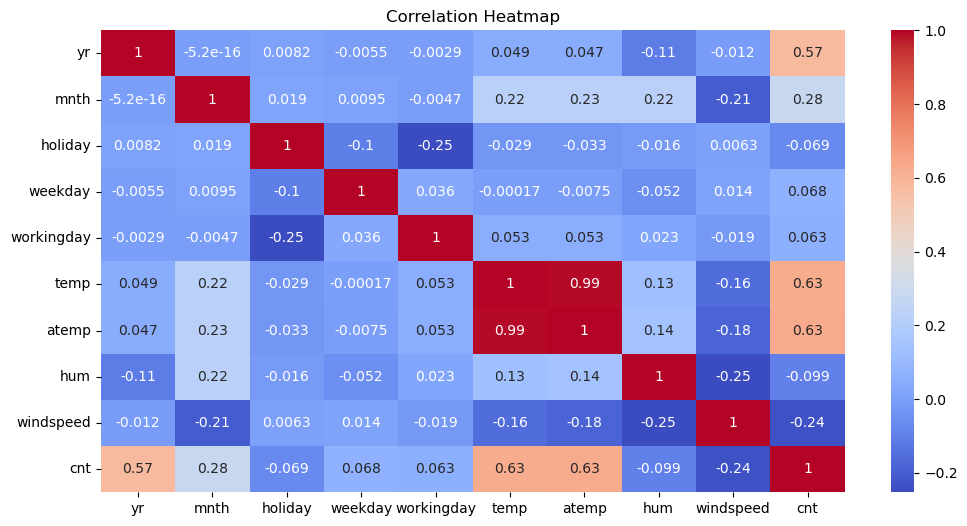

In [7]:
# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Model Building

In [8]:
# Split the data into training and testing sets
X = data.drop('cnt', axis=1)
y = data['cnt']

In [9]:
# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection

### Automate Feature Selection basis RFE (Recursive Feature Elimination)

In [12]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_train_scaled, y_train)

In [13]:
# Get the selected features
selected_features_rfe = X.columns[rfe.support_]
print("Selected features by RFE:")
print(selected_features_rfe)

X_train_selected = X_train[selected_features_rfe]
X_test_selected = X_test[selected_features_rfe]

Selected features by RFE:
Index(['yr', 'mnth', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_light_snow', 'weathersit_mist'],
      dtype='object')


In [14]:
# Fit the linear regression model with selected features
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

In [15]:
# Evaluate the model
r2_rfe = r2_score(y_test, y_pred)
n = len(y_test)
p_rfe = X_train_selected.shape[1]
adjusted_r2_rfe = 1 - ((1 - r2_rfe) * (n - 1)) / (n - p_rfe - 1)
print(f'R-squared score with RFE selected features: {r2_rfe:.4f}')
print(f'Adjusted R-squared score with RFE selected features: {adjusted_r2_rfe:.4f}')

R-squared score with RFE selected features: 0.8116
Adjusted R-squared score with RFE selected features: 0.8025


### Manual Feature Selection basis p-values and VIF

In [16]:
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF"] = [sm.OLS(X[col], X.loc[:, X.columns != col]).fit().rsquared_adj for col in X.columns]
    return vif

In [17]:
# Fit the model to get p-values
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     166.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.41e-177
Time:                        12:59:21   Log-Likelihood:                -4147.5
No. Observations:                 511   AIC:                             8325.
Df Residuals:                     496   BIC:                             8389.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2241.31

In [18]:
# Manually select features based on p-values and VIF
p_value_threshold = 0.05
vif_threshold = 5

while True:
    pvalues = model_sm.pvalues
    max_pvalue = pvalues.idxmax()
    if pvalues[max_pvalue] > p_value_threshold:
        X_train_sm = X_train_sm.drop(columns=[max_pvalue])
        model_sm = sm.OLS(y_train, X_train_sm).fit()
    else:
        break

In [19]:
# Calculate VIF and remove features with high VIF
while True:
    vif = calculate_vif(X_train_sm.drop(columns='const'))
    max_vif = vif[vif['VIF'] == vif['VIF'].max()]
    if max_vif['VIF'].values[0] > vif_threshold:
        X_train_sm = X_train_sm.drop(columns=[max_vif['Feature'].values[0]])
        model_sm = sm.OLS(y_train, X_train_sm).fit()
    else:
        break

In [20]:
# Final selected features
final_selected_features = X_train_sm.columns.drop('const')
print("Selected features after p-value and VIF:")
print(final_selected_features)

Selected features after p-value and VIF:
Index(['yr', 'mnth', 'holiday', 'weekday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'weathersit_light_snow',
       'weathersit_mist'],
      dtype='object')


In [21]:
# Model building with manually selected features
X_train_manual_selected = X_train[final_selected_features]
X_test_manual_selected = X_test[final_selected_features]

In [22]:
# Scale the selected features
scaler_manual = StandardScaler()
X_train_manual_scaled = scaler_manual.fit_transform(X_train_manual_selected)
X_test_manual_scaled = scaler_manual.transform(X_test_manual_selected)

In [23]:
model.fit(X_train_manual_scaled, y_train)
y_pred_manual = model.predict(X_test_manual_scaled)

In [24]:
# Evaluate the model
r2_manual = r2_score(y_test, y_pred_manual)
p_manual = X_train_manual_selected.shape[1]
adjusted_r2_manual = 1 - ((1 - r2_manual) * (n - 1)) / (n - p_manual - 1)
print(f'R-squared score with manually selected features: {r2_manual:.4f}')
print(f'Adjusted R-squared score with manually selected features: {adjusted_r2_manual:.4f}')

R-squared score with manually selected features: 0.8275
Adjusted R-squared score with manually selected features: 0.8183


### Final Evaluation

In [26]:
print(f'R-squared score with RFE selected features: {r2_rfe:.4f}')
print(f'Adjusted R-squared score with RFE selected features: {adjusted_r2_rfe:.4f}')

R-squared score with RFE selected features: 0.8116
Adjusted R-squared score with RFE selected features: 0.8025


In [27]:
print(f'R-squared score with manually selected features: {r2_manual:.4f}')
print(f'Adjusted R-squared score with manually selected features: {adjusted_r2_manual:.4f}')

R-squared score with manually selected features: 0.8275
Adjusted R-squared score with manually selected features: 0.8183
